In [1]:
# Apply ML models to the reflectance + VI data in order to classify/predict disease status


In [2]:
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy

In [3]:
# Try with 2021 data first

data_2021 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')

In [4]:
data_2021.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,PM_inc,DM_inc
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,DM,0.0,0.0,0.05,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,DM,0.0,0.0,0.10,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,DM,0.0,0.0,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,DM,0.0,0.0,0.60,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,DM,0.0,0.0,0.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0


In [5]:
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']= df['green']/df['red']
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']
    
    return df

In [6]:
add_vis(data_2021)

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,PM_inc,DM_inc,ndvi,evi,savi,arvi,gcc,gri,grvi,bgvi
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,...,0.0,0.0,0.757132,0.484168,0.451614,0.715161,0.479577,1.657331,0.247365,-1.977151
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,...,0.0,0.0,0.723710,0.443716,0.418440,0.671497,0.469003,1.566778,0.220813,-1.923174
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,...,0.0,0.0,0.728841,0.451899,0.423997,0.680854,0.469072,1.580953,0.225092,-1.900855
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,...,0.0,0.0,0.739203,0.463353,0.434767,0.691031,0.473417,1.601672,0.231264,-1.949141
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,...,0.0,0.0,0.765697,0.493868,0.457899,0.730553,0.484359,1.715836,0.263578,-1.976909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,20210816,303,0.017663,0.065519,0.048503,0.248441,19,15,2021-08-17,18.0,...,90.0,5.0,0.673318,0.355257,0.376320,0.515878,0.497544,1.350815,0.149231,-3.626302
1191,20210816,305,0.009077,0.061277,0.038242,0.256381,20,1,2021-08-17,31.0,...,20.0,0.0,0.740401,0.384656,0.411778,0.583637,0.564266,1.602362,0.231467,-6.680178
1192,20210816,307,0.009167,0.060350,0.038300,0.249923,20,3,2021-08-17,40.0,...,85.0,0.0,0.734234,0.374960,0.402722,0.575031,0.559746,1.575718,0.223517,-6.514120
1193,20210816,309,0.011672,0.062224,0.041776,0.253272,20,5,2021-08-17,14.0,...,0.0,0.0,0.716820,0.373304,0.399026,0.557872,0.537934,1.489476,0.196618,-5.256975


In [8]:
# Label data by disease severity and incidence level

data_2021['sev_class']='high'
data_2021.loc[data_2021['DM_severity'] < 10, 'sev_class'] = 'low'

data_2021['inc_class']='high'
data_2021.loc[data_2021['DM_inc'] < 25, 'inc_class'] = 'low'

data_2021['sev_class'].unique()

array(['low', 'high'], dtype=object)

In [13]:
data_2021[data_2021['Date']=='2021-08-03']['DM_inc'].unique()

array([100.])

In [14]:
data_2021[data_2021['Date']=='2021-08-17']['DM_inc'].unique()

array([ 20.,  30.,  35.,  75.,  50.,  15.,  25.,  65.,  45.,  70.,  60.,
        40.,  90.,  95.,  80., 100.,  85.,  10.,  55.,   5.,   0.])

In [15]:
data_2021= data_2021[data_2021.Date != '2021-08-03']

## Resample

Low severity: 860
High severity: 96
Proportion: 8.96 : 1


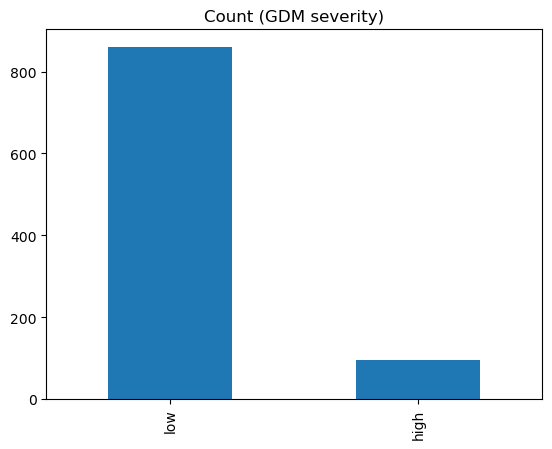

In [16]:
# Visualize data imbalance

target_count = data_2021.sev_class.value_counts()
print('Low severity:', target_count[0])
print('High severity:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (GDM severity)');

Low incidence: 756
High incidence: 200
Proportion: 3.78 : 1


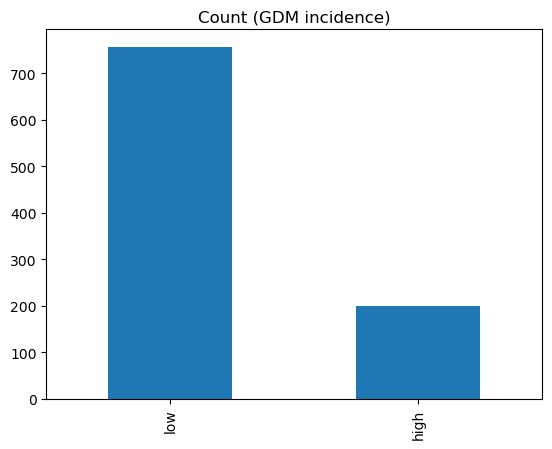

In [17]:
# Visualize data imbalance - incidence

target_count = data_2021.inc_class.value_counts()
print('Low incidence:', target_count[0])
print('High incidence:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (GDM incidence)');

In [18]:
# All possible features

data_2021.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'arvi', 'gcc', 'gri', 'grvi', 'bgvi', 'sev_class', 'inc_class'],
      dtype='object')

In [21]:
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# set features
features = ['blue','green', 'red', 'nir', 'ndvi','evi', 'arvi', 'savi','gcc', 'gri', 'grvi', 'bgvi']

# split into features and class labels
X = data_2021[features]
y = data_2021['sev_class']

# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [22]:
model_all = tree.DecisionTreeClassifier()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_all)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.06%


In [23]:
#Try with just one feature
model_nir = tree.DecisionTreeClassifier()
model_nir.fit(X_train[['nir']], y_train)
y_pred_nir = model_nir.predict(X_test[['nir']])

accuracy = accuracy_score(y_test, y_pred_nir)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.46%


Confusion matrix:
 [[  3  21]
 [ 15 248]]


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_4526/1276672954.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_4526/1276672954.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


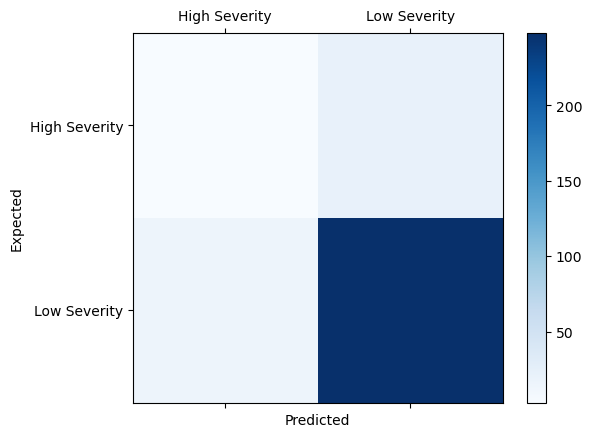

In [24]:
# Plot confusion matrix for the single-feature model (just NIR)

from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_nir)
print('Confusion matrix:\n', conf_mat)

labels = ['High Severity', 'Low Severity']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [25]:
# Resample to balance the dataset and see if accuracy improves
import imblearn as imb


In [26]:
# First try naive random undersampling (samples from majority class with replacement)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [27]:
X_resampled

,blue,green,red,nir,ndvi,evi,arvi,savi,gcc,gri,grvi,bgvi
0,0.039979,0.076186,0.058634,0.357662,0.718304,0.530332,0.644606,0.489516,0.435848,1.299341,0.130186,-1.789475
1,0.041257,0.076057,0.054167,0.355180,0.735351,0.548992,0.682294,0.496532,0.443531,1.404123,0.168096,-1.726187
2,0.041457,0.077332,0.058714,0.357157,0.717633,0.533500,0.649197,0.488785,0.435665,1.317092,0.136849,-1.746562
3,0.043690,0.078921,0.062028,0.346786,0.696548,0.511685,0.623714,0.469995,0.427435,1.272348,0.119853,-1.683783
4,0.041176,0.079490,0.061128,0.347045,0.700482,0.508753,0.621235,0.472241,0.437253,1.300389,0.130582,-1.809826
...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.017704,0.070221,0.049225,0.269561,0.691172,0.384628,0.538996,0.403651,0.512005,1.426540,0.175781,-3.878587
188,0.015727,0.065397,0.045630,0.267518,0.708571,0.389729,0.559639,0.409312,0.515934,1.433192,0.178034,-4.077065
189,0.035957,0.070357,0.049737,0.359267,0.756791,0.557506,0.699531,0.510774,0.450860,1.414583,0.171700,-1.850394
190,0.015221,0.064307,0.045014,0.260679,0.705493,0.380601,0.554037,0.401513,0.516345,1.428594,0.176478,-4.145249


In [28]:
# Check number of high dis/low dis samples in resampled set
y_resampled.value_counts()

high    96
low     96
Name: sev_class, dtype: int64

In [29]:
# Compare to original dataset
y.value_counts()

low     860
high     96
Name: sev_class, dtype: int64

In [30]:
# Now, set up a pipeline to resample then model the data

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [31]:
# Leave some data out for testing later

X, X_left_out, y, y_left_out = train_test_split(
    X, y, stratify=y, random_state=0)

In [32]:
y_left_out.value_counts()

low     215
high     24
Name: sev_class, dtype: int64

In [33]:
model = make_pipeline(
    RandomUnderSampler(random_state=0),
    HistGradientBoostingClassifier(random_state=1)
)
cv_results = cross_validate(
    model, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (undersampling) +/- std. dev.: "
    f"{cv_results['test_score'].mean():.3f} +/- "
    f"{cv_results['test_score'].std():.3f}"
)

Balanced accuracy mean (undersampling) +/- std. dev.: 0.689 +/- 0.078


In [34]:
scores = []
for fold_id, cv_model in enumerate(cv_results["estimator"]):
    scores.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (undersampling) +/- std. dev.: "
    f"{np.mean(scores):.3f} +/- {np.std(scores):.3f}"
)

Balanced accuracy mean (undersampling) +/- std. dev.: 0.788 +/- 0.017


In [35]:
# Repeat with oversampling

from imblearn.over_sampling import RandomOverSampler

model_os = make_pipeline(
    RandomOverSampler(random_state=1),
    HistGradientBoostingClassifier(random_state=1)
)
cv_results_os = cross_validate(
    model_os, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (oversampling) +/- std. dev.: "
    f"{cv_results_os['test_score'].mean():.3f} +/- "
    f"{cv_results_os['test_score'].std():.3f}"
)

Balanced accuracy mean (oversampling) +/- std. dev.: 0.539 +/- 0.028


In [36]:
scores_os = []
for fold_id, cv_model in enumerate(cv_results_os["estimator"]):
    scores_os.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (oversampling) +/- std. dev.: "
    f"{np.mean(scores_os):.3f} +/- {np.std(scores_os):.3f}"
)

Balanced accuracy mean (oversampling) +/- std. dev.: 0.622 +/- 0.033


In [37]:
# Add shrinkage parameter to oversampler
# https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_shrinkage_effect.html#sphx-glr-auto-examples-over-sampling-plot-shrinkage-effect-py

model_shrink = make_pipeline(
    RandomOverSampler(random_state=1, shrinkage=1),
    HistGradientBoostingClassifier(random_state=42)
)
cv_results_shrink = cross_validate(
    model_shrink, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (os/shrinkage) +/- std. dev.: "
    f"{cv_results_shrink['test_score'].mean():.3f} +/- "
    f"{cv_results_shrink['test_score'].std():.3f}"
)

Balanced accuracy mean (os/shrinkage) +/- std. dev.: 0.530 +/- 0.053


In [38]:
scores_shrink = []
for fold_id, cv_model in enumerate(cv_results_shrink["estimator"]):
    scores_shrink.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (os/shrinkage) +/- std. dev.: "
    f"{np.mean(scores_shrink):.3f} +/- {np.std(scores_shrink):.3f}"
)

Balanced accuracy mean (os/shrinkage) +/- std. dev.: 0.641 +/- 0.023


In [ ]:
# To do: compare diff. under/oversampling and model combos
# https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html
